#**Project NLP**
> Analisis Sentimen Komentar Masyarakat terhadap Sirkuit Mandalika pada Media Sosial Twitter

### Tweet Crawling




In [1]:
!pip install --upgrade git+https://github.com/kevctae/twint.git
!pip install -qq whatthelang
!pip install nest_asyncio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/kevctae/twint.git to /tmp/pip-req-build-7lyxyim_
  Running command git clone -q https://github.com/kevctae/twint.git /tmp/pip-req-build-7lyxyim_
     |████████████████████████████████| 1.1 MB 26.7 MB/s 
     |████████████████████████████████| 263 kB 58.8 MB/s 
     |████████████████████████████████| 382 kB 58.6 MB/s 
     |████████████████████████████████| 291 kB 41.2 MB/s 
     |████████████████████████████████| 271 kB 56.7 MB/s 
     |████████████████████████████████| 94 kB 3.9 MB/s 
     |████████████████████████████████| 144 kB 56.2 MB/s 
     |████████████████████████████████| 49 kB 4.9 MB/s 
     |████████████████████████████████| 59 kB 5.7 MB/s 
     |████████████████████████████████| 138 kB 49.0 MB/s 
     |████████████████████████████████| 62 kB 1.7 MB/s 
  Created wheel for twint: filename=twint-2.1.21-py3-none-any.whl size=39179 sha256=3f312d0a96e9c

In [2]:
# Import Library
import twint
import nest_asyncio
# Additional library for get rids of some errors
nest_asyncio.apply()

In [3]:
# Instantiate and configure the twint-object
c = twint.Config()
c.Store_object = True
c.Pandas = True
c.Search = "Mandalika"
c.Since = '2020-03-02'
c.Until = '2022-03-21'
c.Lang = "id"
c.Limit = 1000

# Run search
twint.run.Search(c)

1505695678424842240 2022-03-20 23:59:58 +0000 <garpulicious> Belajar dari mandalika Tidak semua hal bisa diterima dengan logika.
1505695659697278977 2022-03-20 23:59:54 +0000 <MalikAlfarizi12> MotoGP Mandalika sukses.. #AniesBaswedan  https://t.co/hhO27duaZO
1505695642974228481 2022-03-20 23:59:50 +0000 <adhimmhrdika> @ngawur_post Tikungan 13 Mandalika membuat Marc Marquez terjatuh dan motor Alex Rins terbakar, ini menurut pendapat lesti dan billar.
1505695638549266435 2022-03-20 23:59:49 +0000 <FemmyManroe> @eadala_o1 @kulitbumi TENGKYUUU SO MUCHHH PAK JOKOWI.. Acara MANDALIKA SUKSEESSSSS...   Kadal kejang kejang Pak @jokowi . SUKSESSS
1505695601031520261 2022-03-20 23:59:40 +0000 <geloraco> Rara Istiati Wulandari, Ungkap Penyebab Gangguan Hujan Deras saat MotoGP Mandalika  https://t.co/WQeOflIc2u
1505695522350596096 2022-03-20 23:59:21 +0000 <dedensujana> Salah satu yg terpenting bagaimana memelihara Circuit Mandalika jangan sampai seperti gedung2 bekas PON yg terbekalai krn gak keur

In [4]:
# Cleanup
tweets = twint.storage.panda.Tweets_df.drop_duplicates(subset=['id'])
# Reindex
tweets.index = range(len(tweets))
# Remove non-Indonesian
from whatthelang import WhatTheLang
wtl = WhatTheLang()

# This function makes easy to handle exceptions (e.g. no text where text should be)
# Not really needed but can be useful 
def detect_lang(text):
    try: 
        return wtl.predict_lang(text)
    except Exception:
        return 'exp'

# Added performance measure here
tweets['lang'] = tweets['tweet'].map(lambda t: detect_lang(t))
# keep only Indonesian
tweets = tweets[tweets.lang == 'id']

# Exporting
# tweets.to_json('dataset.json')
tweets.to_csv('dataset.csv')

### Preprocessing Data

In [5]:
!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Preprocessing Data

In [5]:
!pip install sastrawi
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 10.0 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import nltk, re, string
import pandas as pd
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [9]:
data = pd.read_csv('dataset.csv')
data.drop(['Unnamed: 0','conversation_id','created_at','timezone','place','language','hashtags','cashtags','user_id','user_id_str','day','hour','link','urls','photos','video','thumbnail','retweet','nlikes','nreplies','nretweets','quote_url','search','near','geo','source','user_rt_id','user_rt','retweet_id','reply_to','retweet_date','translate','trans_src','trans_dest','lang','name','id'], axis=1, inplace=True)
data.sample(n=3)

,date,tweet,username
352,2022-03-20 22:51:04,"@SisiwittFrida Intinya, kamu itu gak suka, iri...",Hantoro2011
615,2022-03-20 20:03:26,"Saking hype abis nya Mandalika, pw hujan dan m...",bebenyittalks
518,2022-03-20 21:21:22,"Keakraban @_moliveira88 dengan Risman, Pegawai...",Aryprasetyo85


In [11]:
# Create Sastrawi stemmer
stemmer = StemmerFactory().create_stemmer()
# Create Stopword
with open("Stopword.txt", "r") as f:
    stop_words = f.readline()
    stop_words = stop_words.split()
# Preprocessor
def preprocessor(text):
    # Convert to lower case
    text = text.lower()
    # Remove additional code
    text = text.replace("\\xe2\\x80\\xa6", "")
    # Convert www.* or https?://* to URL
    text = re.sub("((www\.[^\s]+)|(https?://[^\s]+))", "", text)
    # Convert @username to AT_USER
    text = re.sub("@[^\s]+", "", text)
    # Remove additional white spaces
    text = re.sub("[\s]+", " ", text)
    # Replace #word with word
    text = re.sub(r"#([^\s]+)", r"\1", text)
    # Menghapus angka dari teks
    text = re.sub(r"\d+", "", text)
    # Menganti tanda baca dengan spasi
    text = text.translate(str.maketrans(string.punctuation, " " * len(string.punctuation)))
    return text

In [13]:
data["tweet_clean"] = data["tweet"].apply(lambda x: preprocessor(x))
data = data.drop_duplicates()
data.sample(n=3)

,date,tweet,username,tweet_clean
348,2022-03-20 22:52:10,@AnakLolina2 @Mdy_Asmara1701 Wan jamban ada di...,haribanjarnahor,wan jamban ada dimandalika toch wajar disana...
514,2022-03-20 21:23:18,Mario Aji Semakin Percaya Diri Usai Cetak Seja...,CNNIndonesia,mario aji semakin percaya diri usai cetak seja...
235,2022-03-20 23:09:02,Suksesnya Mandalika GP tidak hanya mengharumka...,maliBelait3638,suksesnya mandalika gp tidak hanya mengharumka...


In [14]:
# Tokenizer
def tokenizer(text):
    words = word_tokenize(text)
    tokens = []
    for w in words:
        # add tokens
        if len(w) > 3 and w not in stop_words:
            w = stemmer.stem(w)
            tokens.append(w.lower())
    return " ".join(tokens)

In [15]:
data['tweet_clean'] = data['tweet_clean'].apply(lambda x : tokenizer(x))
data = data.drop_duplicates()
data.sample(n=3)

,date,tweet,username,tweet_clean
206,2022-03-20 23:16:48,Ritual Kendi IKN hingga Aksi Pawang Hujan di M...,Icu663,ritual kendi hingga aksi pawang hujan mandalik...
436,2022-03-20 22:18:03,"Menurut pihak PHRI NTB, 95 persen hotel yang s...",kompascom,turut pihak phri persen hotel yang sudah isi p...
393,2022-03-20 22:38:59,@ChusnulCh__ @rafael_61499 Mdh2an Pemerintah t...,CecepMadjid,mdhan perintah ganya perhati mandalika dngn an...


In [16]:
data.to_csv('clean_dataset.csv')

### Text Vectorization

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
vectorizer_tfidf = TfidfVectorizer(max_features=1000)

In [19]:
word_tfidf = vectorizer_tfidf.fit_transform(data["tweet_clean"].values)
word_tfidf

<701x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 8532 stored elements in Compressed Sparse Row format>

In [21]:
# Nama fitur
nama_fitur = vectorizer_tfidf.get_feature_names_out()

# Dimensi data
dimensions = word_tfidf.get_shape()
print(f"Jumlah artikel = {dimensions[0]}")
print(f"Jumlah fitur   = {dimensions[1]}")

Jumlah artikel = 701
Jumlah fitur   = 1000


In [22]:
content1, content2 = [], []

for n in range(dimensions[0]):
    # Convert sparse matrix row by row
    row = word_tfidf.getrow(n).toarray()[0].ravel()
    # Get top values and its indexes
    top_ten_indices = row.argsort()[-1]
    top_ten_values = row[row.argsort()[-1]]
    # Identify the highest TFIDF value and word #
    highestTFIDFword = nama_fitur[top_ten_indices]
    highestTFIDFvalue = top_ten_values
    top1word = {
        "nomor artikel": n + 1,
        "nilai TFIDF": highestTFIDFvalue,
        "top word": highestTFIDFword,
    }
    content1.append(top1word)
    content2.append(highestTFIDFword)

# Hitung Frekuiensi kata dengan bobot terbesar
content2 = np.asarray(content2)
words, n = np.unique(content2, return_counts=True)

# Convert to DataFrame lalu urutkan secara descending
# lalu pilih 20 kata dengan frekuensi terbesar
words_data = (
    pd.DataFrame({"Kata": words, "Banyak": n}).sort_values(by="Banyak", ascending=False).head(20)
)
words_data

,Kata,Banyak
23,axiata,18
263,masyarakat,12
429,telekomunikasi,9
269,merchandise,6
165,kadrun,5
74,cepat,5
401,serah,5
483,widodo,4
239,lombok,4
395,semua,4


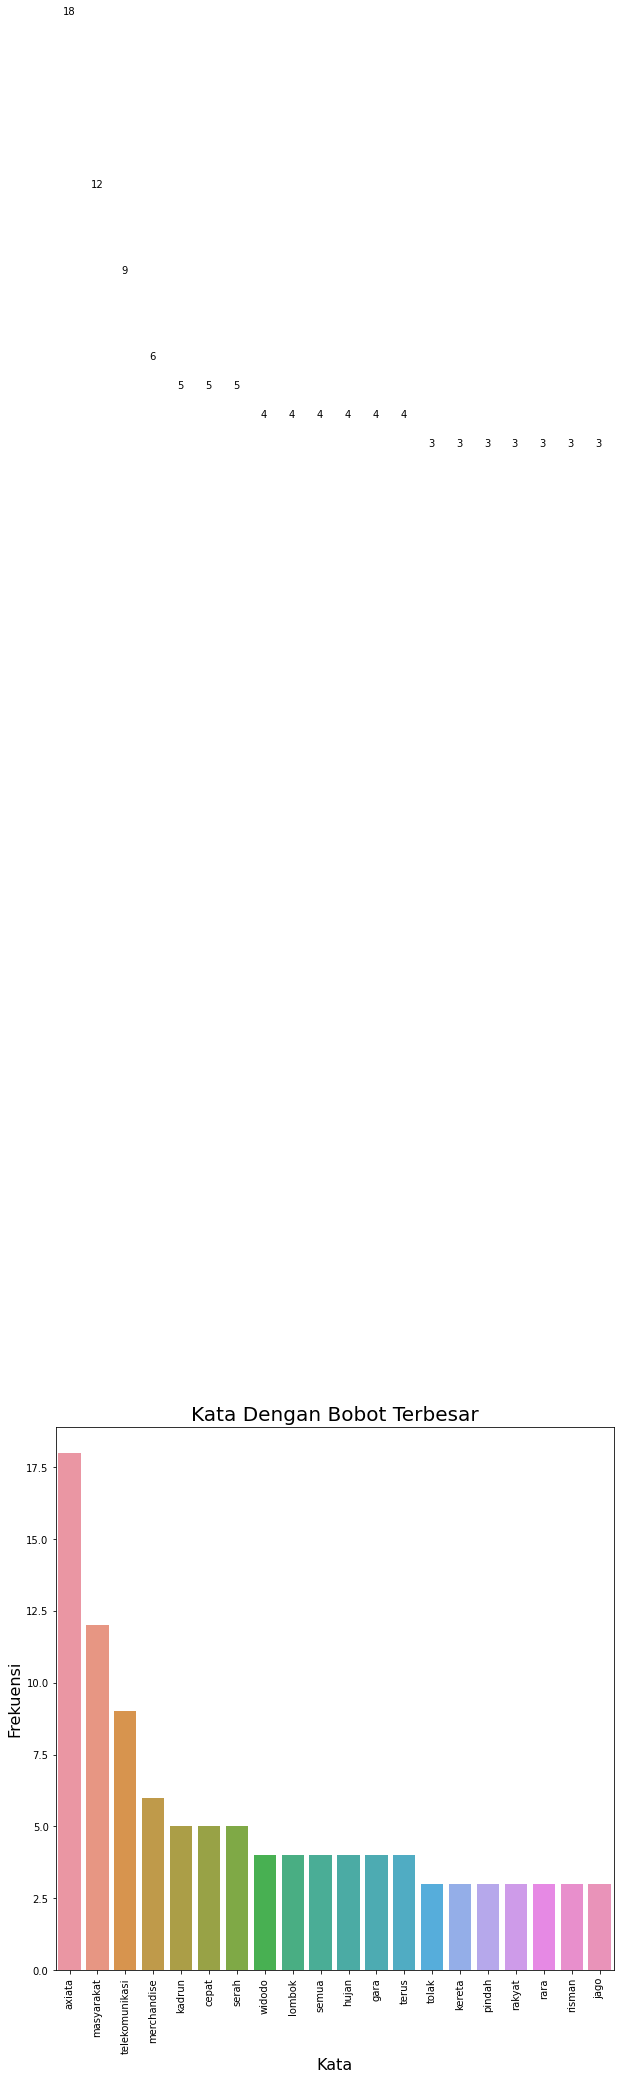

In [23]:
# Plotting Barplot
plt.figure(figsize=(10, 10))
sns.barplot(x=words_data["Kata"], y=words_data["Banyak"])
for i, v in enumerate(words_data["Banyak"].tolist()):
    plt.text(i - len(str(v)) / 10 - 0.05, v + 50, str(v), fontsize=10)
plt.title("Kata Dengan Bobot Terbesar", fontsize=20)
plt.xticks(rotation=90)
plt.xlabel("Kata", fontsize=16)
plt.ylabel("Frekuensi", fontsize=16)
plt.show()

### Loading Label Data
Labeling dilakukan secara manual, dengan indikator:
*   0 = Netral
*   1 = Positif
*   2 = Negatif

In [24]:
label = pd.read_csv('clean_dataset_label.csv')
label.head()

,Unnamed: 0,date,tweet,username,tweet_clean,label
0,0,3/20/22 23:59,Belajar dari mandalika Tidak semua hal bisa di...,garpulicious,Belajar dari mandalika Tidak semua hal bisa di...,0
1,1,3/20/22 23:59,@ngawur_post Tikungan 13 Mandalika membuat Mar...,adhimmhrdika,Tikungan Mandalika membuat Marc Marquez terjat...,2
2,2,3/20/22 23:59,@eadala_o1 @kulitbumi TENGKYUUU SO MUCHHH PAK ...,FemmyManroe,TENGKYUUU SO MUCHHH PAK JOKOWI.. Acara MANDALI...,1
3,3,3/20/22 23:59,"Rara Istiati Wulandari, Ungkap Penyebab Ganggu...",geloraco,"Rara Istiati Wulandari, Ungkap Penyebab Ganggu...",0
4,4,3/20/22 23:59,Salah satu yg terpenting bagaimana memelihara ...,dedensujana,Salah satu yg terpenting bagaimana memelihara ...,0


In [25]:
label["label"].value_counts()

0    309
1    300
2     94
Name: label, dtype: int64

In [26]:
label["tweet_clean"] = label["tweet"].apply(lambda x: preprocessor(x))
label["tweet_clean"] = label["tweet"].apply(lambda x: tokenizer(x))
label["tweet_clean"].values[:5]

array(['ajar dari mandalika tidak semua bisa terima dengan logika',
       'ngawur post tikung mandalika buat marc marquez jatuh motor alex rins bakar turut dapat lesti billar',
       'eadala o1 kulitbumi tengkyuuu muchhh jokowi acara mandalika sukseesssss kadal kejang kejang jokowi suksesss',
       'rara istiati wulandari ungkap sebab ganggu hujan deras saat motogp mandalika https t co wqeoflic2u',
       'salah satu penting bagaimana pelihara circuit mandalika jangan sampai seperti gedung2 bekas terbekalai urus pemda'],
      dtype=object)

In [27]:
x = vectorizer_tfidf.transform(label["tweet_clean"].values)
y = label["label"].values

In [28]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=2020)

### Fitting Model

In [29]:
# Modelling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import metrics

classifiers = {
    "Decision Tree Classifier": DecisionTreeClassifier(random_state=2020),
    "Logistic Regression": LogisticRegression(random_state=2020),
    "Random Forest Classifier": RandomForestClassifier(random_state=2020),
    "SVM": SVC(kernel="linear", probability=True, random_state=2020),
}

for name in classifiers.keys():
    classifiers[name].fit(x_train, y_train)
    y_pred = classifiers[name].predict(x_valid)
    print(f"Akurasi dari {name} : ", metrics.accuracy_score(y_valid, y_pred))

Akurasi dari Decision Tree Classifier :  0.5815602836879432
Akurasi dari Logistic Regression :  0.6950354609929078
Akurasi dari Random Forest Classifier :  0.7163120567375887
Akurasi dari SVM :  0.6524822695035462


### Prediction

In [37]:
data["DTC_prediction"] = classifiers["Decision Tree Classifier"].predict(word_tfidf)
data.head(3)

,date,tweet,username,tweet_clean,prediction,DTC_prediction
0,2022-03-20 23:59:58,Belajar dari mandalika Tidak semua hal bisa di...,garpulicious,ajar dari mandalika tidak semua bisa terima de...,0,0
1,2022-03-20 23:59:50,@ngawur_post Tikungan 13 Mandalika membuat Mar...,adhimmhrdika,tikung mandalika buat marc marquez jatuh motor...,2,2
2,2022-03-20 23:59:49,@eadala_o1 @kulitbumi TENGKYUUU SO MUCHHH PAK ...,FemmyManroe,tengkyuuu muchhh jokowi acara mandalika suksee...,1,0


In [38]:
data["LR_prediction"] = classifiers["Logistic Regression"].predict(word_tfidf)
data.head(3)

,date,tweet,username,tweet_clean,prediction,DTC_prediction,LR_prediction
0,2022-03-20 23:59:58,Belajar dari mandalika Tidak semua hal bisa di...,garpulicious,ajar dari mandalika tidak semua bisa terima de...,0,0,0
1,2022-03-20 23:59:50,@ngawur_post Tikungan 13 Mandalika membuat Mar...,adhimmhrdika,tikung mandalika buat marc marquez jatuh motor...,2,2,2
2,2022-03-20 23:59:49,@eadala_o1 @kulitbumi TENGKYUUU SO MUCHHH PAK ...,FemmyManroe,tengkyuuu muchhh jokowi acara mandalika suksee...,1,0,1


In [39]:
data["RFC_prediction"] = classifiers["Random Forest Classifier"].predict(word_tfidf)
data.head(3)

,date,tweet,username,tweet_clean,prediction,DTC_prediction,LR_prediction,RFC_prediction
0,2022-03-20 23:59:58,Belajar dari mandalika Tidak semua hal bisa di...,garpulicious,ajar dari mandalika tidak semua bisa terima de...,0,0,0,0
1,2022-03-20 23:59:50,@ngawur_post Tikungan 13 Mandalika membuat Mar...,adhimmhrdika,tikung mandalika buat marc marquez jatuh motor...,2,2,2,2
2,2022-03-20 23:59:49,@eadala_o1 @kulitbumi TENGKYUUU SO MUCHHH PAK ...,FemmyManroe,tengkyuuu muchhh jokowi acara mandalika suksee...,1,0,1,0


In [40]:
data["SVM_prediction"] = classifiers["SVM"].predict(word_tfidf)
data.head(3)

,date,tweet,username,tweet_clean,prediction,DTC_prediction,LR_prediction,RFC_prediction,SVM_prediction
0,2022-03-20 23:59:58,Belajar dari mandalika Tidak semua hal bisa di...,garpulicious,ajar dari mandalika tidak semua bisa terima de...,0,0,0,0,0
1,2022-03-20 23:59:50,@ngawur_post Tikungan 13 Mandalika membuat Mar...,adhimmhrdika,tikung mandalika buat marc marquez jatuh motor...,2,2,2,2,2
2,2022-03-20 23:59:49,@eadala_o1 @kulitbumi TENGKYUUU SO MUCHHH PAK ...,FemmyManroe,tengkyuuu muchhh jokowi acara mandalika suksee...,1,0,1,0,1


### Visualization

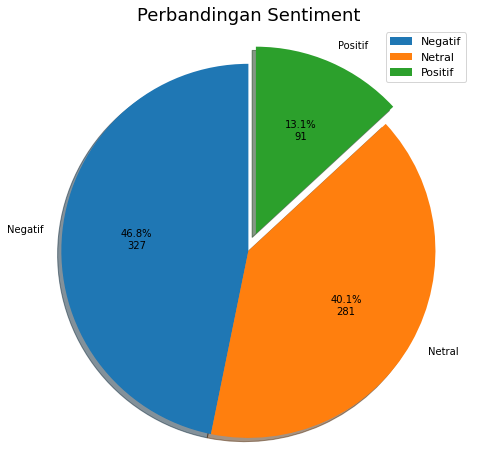

In [43]:
# Plotting Pie
def pct_pie(pct, allvals):
    absolute = int(pct / 100.0 * np.sum(allvals))
    return "{:.1f}%\n{:d}".format(pct, absolute)


sentimen = data["tweet"].groupby(data["DTC_prediction"]).count().values

plt.figure(figsize=(8, 8))
plt.pie(
    sentimen,
    explode=(0, 0, 0.1),
    labels=["Negatif", "Netral", "Positif"],
    shadow=True,
    autopct=lambda pct: pct_pie(pct, sentimen),
    startangle=90,
)
plt.title("Perbandingan Sentiment", fontsize=18)
plt.axis("equal")
plt.legend(fontsize=11)
plt.show()

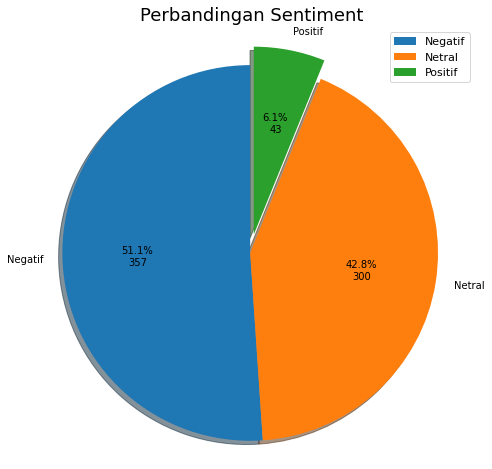

In [44]:
# Plotting Pie
def pct_pie(pct, allvals):
    absolute = int(pct / 100.0 * np.sum(allvals))
    return "{:.1f}%\n{:d}".format(pct, absolute)


sentimen = data["tweet"].groupby(data["LR_prediction"]).count().values

plt.figure(figsize=(8, 8))
plt.pie(
    sentimen,
    explode=(0, 0, 0.1),
    labels=["Negatif", "Netral", "Positif"],
    shadow=True,
    autopct=lambda pct: pct_pie(pct, sentimen),
    startangle=90,
)
plt.title("Perbandingan Sentiment", fontsize=18)
plt.axis("equal")
plt.legend(fontsize=11)
plt.show()

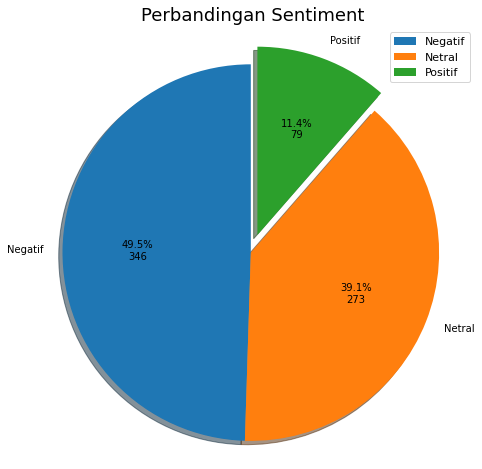

In [45]:
# Plotting Pie
def pct_pie(pct, allvals):
    absolute = int(pct / 100.0 * np.sum(allvals))
    return "{:.1f}%\n{:d}".format(pct, absolute)


sentimen = data["tweet"].groupby(data["RFC_prediction"]).count().values

plt.figure(figsize=(8, 8))
plt.pie(
    sentimen,
    explode=(0, 0, 0.1),
    labels=["Negatif", "Netral", "Positif"],
    shadow=True,
    autopct=lambda pct: pct_pie(pct, sentimen),
    startangle=90,
)
plt.title("Perbandingan Sentiment", fontsize=18)
plt.axis("equal")
plt.legend(fontsize=11)
plt.show()

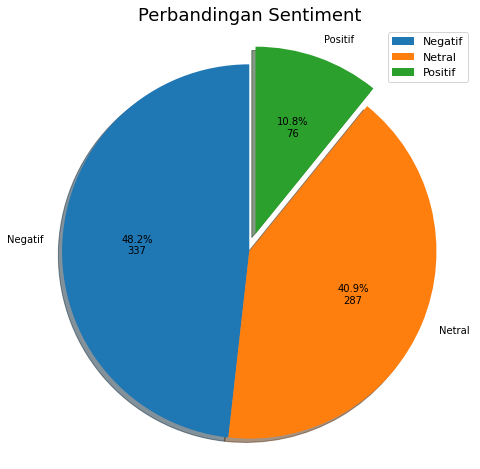

In [46]:
# Plotting Pie
def pct_pie(pct, allvals):
    absolute = int(pct / 100.0 * np.sum(allvals))
    return "{:.1f}%\n{:d}".format(pct, absolute)


sentimen = data["tweet"].groupby(data["SVM_prediction"]).count().values

plt.figure(figsize=(8, 8))
plt.pie(
    sentimen,
    explode=(0, 0, 0.1),
    labels=["Negatif", "Netral", "Positif"],
    shadow=True,
    autopct=lambda pct: pct_pie(pct, sentimen),
    startangle=90,
)
plt.title("Perbandingan Sentiment", fontsize=18)
plt.axis("equal")
plt.legend(fontsize=11)
plt.show()